In [48]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

In [9]:
! cat ../data/swbook1_3e/textfiles/CEOSAL1.DES

In [11]:
data_path = "../data/swbook1_3e/textfiles/"

header_ceosa1 = ['salary', 'pcsalary', 'sales', 'roe', 'pcroe', 'ros', 'indus', 'finance', 'consprod', 'utility', 'lsalary', 'lsales']

df_ceosa1 = pd.read_table(data_path + "/CEOSAL1.raw", sep="\s+", header=None, names=header_ceosa1)

df_ceosa1.head()


,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
0,1095,20,27595.0,14.1,106.4,191,1,0,0,0,6.998509,10.225390
1,1001,32,9958.0,10.9,-30.6,13,1,0,0,0,6.908755,9.206132
2,1122,9,6125.9,23.5,-16.3,14,1,0,0,0,7.022868,8.720281
3,578,-9,16246.0,5.9,-25.7,-21,1,0,0,0,6.359574,9.695602
4,1368,7,21783.2,13.8,-3.0,56,1,0,0,0,7.221105,9.988894


In [16]:
s_y = df_ceosa1.salary
s_X = df_ceosa1.roe

In [24]:
df_X = pd.concat([pd.Series(np.ones(df_ceosa1.shape[0]), name='intercept'), 
                 df_ceosa1.roe], axis = 1)

In [26]:
X = df_X.values
y = s_y.values

In [28]:
beta = (np.linalg.inv(X.T @ X)) @ X.T @ y
beta

array([ 963.19132747,   18.50118685])

In [34]:
u = y - X @ beta
n, k = X.shape
sig2 = u.T @ u / (n-k)
std = np.sqrt()

In [42]:
std = np.sqrt(np.diag(sig2 * np.linalg.inv(X.T @ X)))
std

array([ 213.24025691,   11.12325089])

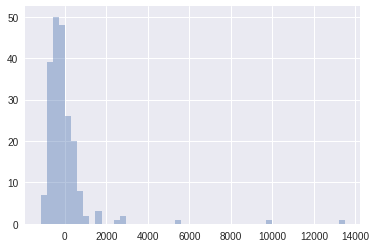

In [45]:
sns.distplot(u, kde=False)

In [49]:
from scipy.stats import t

In [53]:
t.interval(0.90, n-k)

(-1.6522480859926569, 1.6522480859926563)

In [56]:
print(beta)
print(std)


[ 963.19132747   18.50118685]
[ 213.24025691   11.12325089]
